# 0. Data Selecting

Recall some data we have used in submission 1.

For gold ETF, we choose SPDR Gold Shares ETF, with symbol GLD.

For equity ETF outside US, we choose iShares MSCI India ETF, with symbol INDA.

For bitcoin, we choose Grayscale Bitcoin Trust, with symbol GBTC



All prices are in USD
Data source: https://finance.yahoo.com

# 1. Data Importing

In [322]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arch
from statsmodels.tsa.stattools import kpss, coint
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR
%matplotlib inline

Downlaoding SPDR Gold Shares (GLD)- NYSEArca - NYSEArca Delayed Price. Currency in USD, iShares MSCI India ETF (INDA)
BATS - BATS Delayed Price. Currency in USD, and Grayscale Bitcoin Trust (BTC) (GBTC)
Other OTC - Other OTC Delayed Price. Currency in USD


**Import closing prices for the entire year of 2020 for your gold ETF, your equity ETF, and bitcoin.**

Notice :: : We have used yfinance package function to download the stocks and apply econometrics without importing them back from .csv files

In [323]:
gold_df = yf.download("GLD", start="2020-4-1", end="2020-12-31")
india_df = yf.download("INDA", start="2020-4-1", end="2020-12-31")
bitcoin_df= yf.download("GBTC", start="2020-4-1", end="2020-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Available data for gold

In [324]:
gold_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,151.360001,151.800003,147.970001,148.050003,148.050003,13319500
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300


In [325]:
gold_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,175.100006,176.210007,175.059998,175.649994,175.649994,6542800
2020-12-24,175.550003,176.369995,175.509995,176.350006,176.350006,3695400
2020-12-28,177.259995,177.910004,175.630005,175.710007,175.710007,7778700
2020-12-29,176.250000,176.970001,175.570007,176.350006,176.350006,5983700
2020-12-30,176.440002,177.720001,176.440002,177.699997,177.699997,5914000


Available data for iShares India

In [326]:
india_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,24.090000,24.469999,23.870001,24.110001,24.002792,10298500
2020-04-01,22.830000,22.910000,22.330000,22.330000,22.230707,7727500
2020-04-02,22.709999,23.150000,22.480000,22.910000,22.808126,9119300
2020-04-03,22.610001,22.690001,21.920000,22.010000,21.912128,4746600
2020-04-06,22.990000,23.680000,22.920000,23.670000,23.564747,8111000


In [327]:
india_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,38.990002,39.029999,38.919998,38.959999,38.923748,4906100
2020-12-24,39.230000,39.369999,39.230000,39.360001,39.323380,2924800
2020-12-28,39.759998,39.779999,39.580002,39.720001,39.683044,4541800
2020-12-29,39.840000,39.980000,39.740002,39.869999,39.832901,6577000
2020-12-30,40.110001,40.220001,40.060001,40.099998,40.062687,6492800


Available data for bitcoin

In [328]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,7.070,7.14,6.94,7.120,7.120,2675500
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400


In [329]:
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,30.500000,30.850000,28.820000,28.879999,28.879999,11054700
2020-12-24,28.700001,28.709999,26.450001,27.350000,27.350000,12591200
2020-12-28,33.330002,33.340000,30.120001,30.450001,30.450001,19499400
2020-12-29,31.110001,31.150000,28.500000,30.080000,30.080000,16651800
2020-12-30,31.299999,33.000000,31.000000,32.900002,32.900002,18116500


# 2. Data Processing

Computing the dail returns of selected data set.

We use adjusted close prices to calculate the daily returns. Adjusted close prices are the prices that already take into account stock split and dividends, which reflex more accurate the change of the prices.

In [330]:
gold_df["Daily Return"] = gold_df["Adj Close"].pct_change(1)
gold_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,151.360001,151.800003,147.970001,148.050003,148.050003,13319500,NaN
2020-04-01,148.199997,150.080002,147.850006,149.449997,149.449997,11827400,0.009456
2020-04-02,151.199997,152.500000,150.699997,151.899994,151.899994,9188300,0.016393
2020-04-03,152.229996,153.089996,151.660004,152.649994,152.649994,8469100,0.004937
2020-04-06,154.160004,157.220001,153.960007,156.880005,156.880005,14739300,0.027711


In [331]:
india_df["Daily Return"] = india_df["Adj Close"].pct_change(1)
india_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,24.090000,24.469999,23.870001,24.110001,24.002792,10298500,NaN
2020-04-01,22.830000,22.910000,22.330000,22.330000,22.230707,7727500,-0.073828
2020-04-02,22.709999,23.150000,22.480000,22.910000,22.808126,9119300,0.025974
2020-04-03,22.610001,22.690001,21.920000,22.010000,21.912128,4746600,-0.039284
2020-04-06,22.990000,23.680000,22.920000,23.670000,23.564747,8111000,0.075420


In [332]:
bitcoin_df["Daily Return"] = bitcoin_df["Adj Close"].pct_change(1)
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-31,7.070,7.14,6.94,7.120,7.120,2675500,NaN
2020-04-01,6.800,6.90,6.41,6.495,6.495,4274800,-0.087781
2020-04-02,7.000,7.87,6.98,7.720,7.720,7980600,0.188607
2020-04-03,7.940,7.94,7.25,7.480,7.480,3059800,-0.031088
2020-04-06,7.824,8.06,7.71,7.950,7.950,4910400,0.062834


# 3. Data summaries

We Stock Summary provides information on stock groups and shows the quantity details, rate and closing value of the stock items under the stocks provided.

We to coompute a 20-day moving average price of your gold ETF, india ETF and Bitcoin as well.  The moving average price on 1 April 2020 should include data from March. 

In [333]:
### Defining a function which will help us to summarize the data
def summary(df):
    data_given = get_data(df, 3, 12, "Adj Close")
    moving_average = data_given.rolling(20, min_periods=1).mean() #20 days before
    return get_data(moving_average, 4, 12)

### Definition of function getting the data
df_names_To_be_used = {0: "gold.df", 1: "india.df", 2: "bitcoin.df"}
dfs = [gold_df, india_df, bitcoin_df]
def get_data(df, month_start, month_end, column=None):
    data_given = df[(df.index >= f"2020-{month_start:02d}-01") & (df.index < f"2020-{month_end:02d}-01")]
    if column: 
        data_given = data_given[column]
    return data_given

******************************************************************************************
******************************************************************************************
Moving average for gold.df from April to December
__________________________________________________


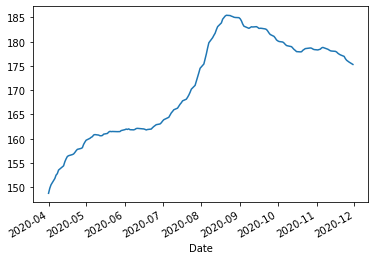

Date
2020-04-01    148.750000
2020-04-02    149.799998
2020-04-03    150.512497
2020-04-06    151.785999
2020-04-07    152.494998
Name: Adj Close, dtype: float64
Date
2020-11-23    176.975001
2020-11-24    176.503500
2020-11-25    176.172500
2020-11-27    175.792000
2020-11-30    175.315500
Name: Adj Close, dtype: float64
******************************************************************************************
******************************************************************************************
Moving average for india.df from April to December
__________________________________________________


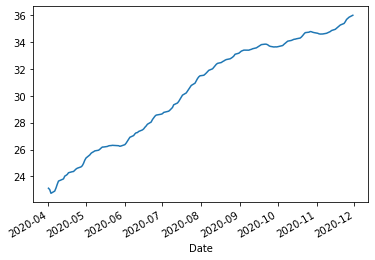

Date
2020-04-01    23.116750
2020-04-02    23.013875
2020-04-03    22.738439
2020-04-06    22.903700
2020-04-07    23.128364
Name: Adj Close, dtype: float64
Date
2020-11-23    35.388600
2020-11-24    35.522364
2020-11-25    35.687074
2020-11-27    35.854778
2020-11-30    35.999024
Name: Adj Close, dtype: float64
******************************************************************************************
******************************************************************************************
Moving average for bitcoin.df from April to December
__________________________________________________


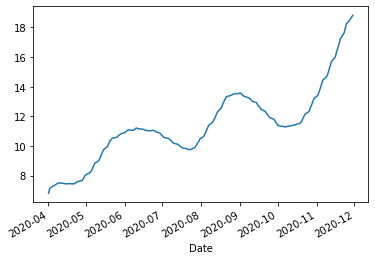

Date
2020-04-01    6.807500
2020-04-02    7.111667
2020-04-03    7.203750
2020-04-06    7.353000
2020-04-07    7.404167
Name: Adj Close, dtype: float64
Date
2020-11-23    17.61425
2020-11-24    17.94875
2020-11-25    18.24650
2020-11-27    18.42525
2020-11-30    18.81595
Name: Adj Close, dtype: float64


In [334]:
moving_averages = []
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90)
    print("\033[1m" + f"Moving average for {df_names_To_be_used [index]} from April to December")
    print("_" * 50)
    data_given = summary(df)
    data_given.plot()
    plt.show()
    print(data_given.head())
    print(data_given.tail())
    moving_averages.append(data_given)

# 4. Graphing

The task is to

Graph each price series along with its moving average from April 2020 through Dec 2020.

Comments on how the price series and average series intersect or not.

Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend


******************************************************************************************
******************************************************************************************
Available prices and the moving average for gold.df from April to December
___________________________________________________________________________


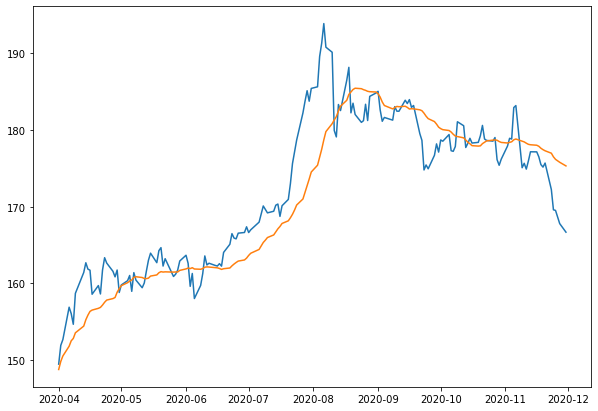

******************************************************************************************
******************************************************************************************
Available prices and the moving average for india.df from April to December
___________________________________________________________________________


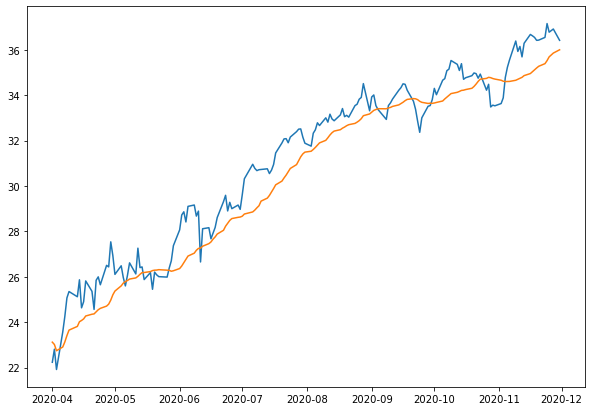

******************************************************************************************
******************************************************************************************
Available prices and the moving average for bitcoin.df from April to December
___________________________________________________________________________


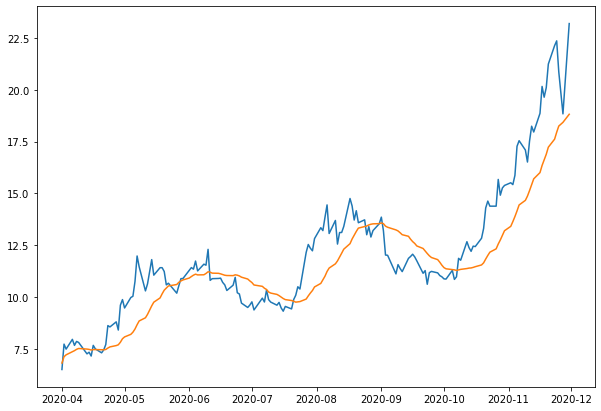

In [335]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90)
    print("\033[1m"+f"Available prices and the moving average for {df_names_To_be_used [index]} from April to December")
    print("_" * 75)
    data = get_data(df, 4, 12, "Adj Close")
    moving_average = moving_averages[index]
    plt.figure(figsize=(10,7))
    plt.plot(data)
    plt.plot(moving_average)
    plt.show()

Labelling and legend

******************************************************************************************
******************************************************************************************
The prices of gold.df and india.df from April to December
____________________________________________________________


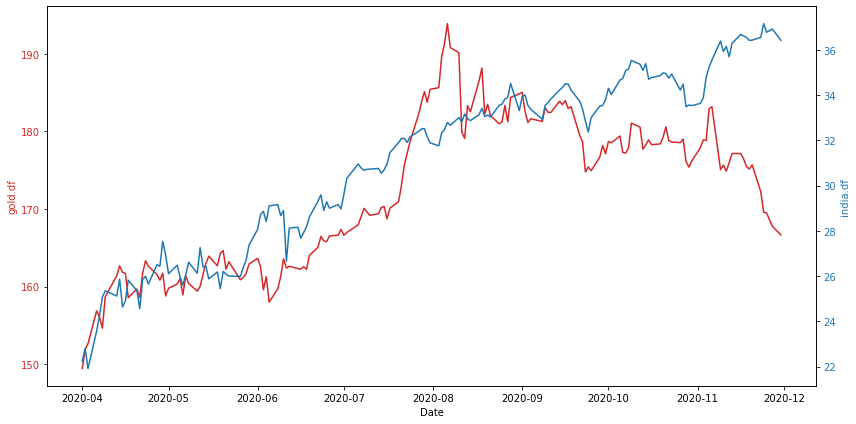

******************************************************************************************
******************************************************************************************
The prices of gold.df and bitcoin.df from April to December
____________________________________________________________


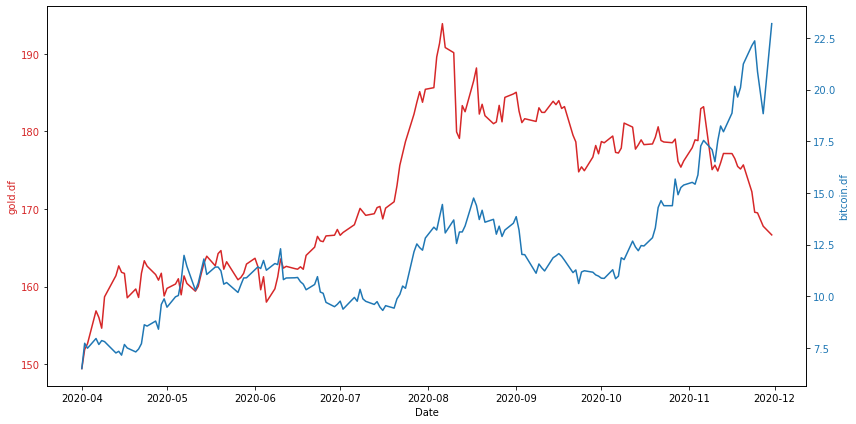

******************************************************************************************
******************************************************************************************
The prices of india.df and bitcoin.df from April to December
____________________________________________________________


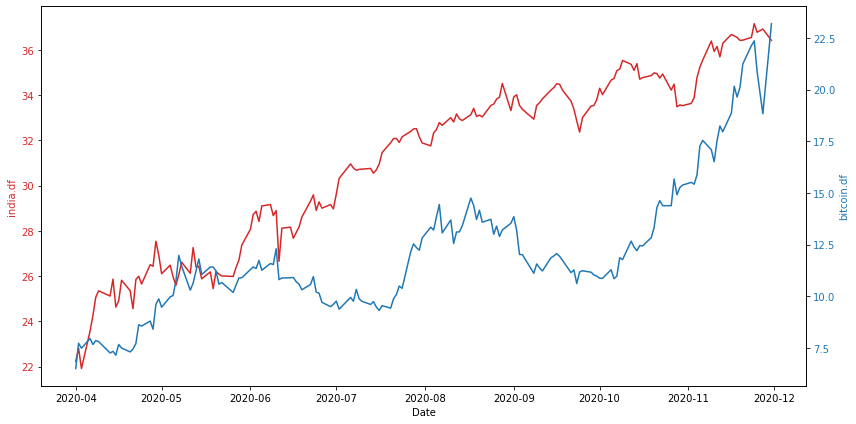

In [336]:
for a, b in [(0, 1), (0, 2), (1, 2)]:
    print("*" * 90)
    print("*" * 90)
    print("\033[1m" + f"The prices of {df_names_To_be_used[a]} and {df_names_To_be_used[b]} from April to December")
    print("_" * 60)
    y1_data = get_data(dfs[a], 4, 12, "Adj Close")
    y2_data = get_data(dfs[b], 4, 12, "Adj Close")
    fig, y1_axis = plt.subplots(figsize=(12,6))

    y1_color = 'tab:red'
    y2_color = 'tab:blue'

    y1_axis.set_xlabel('Date')
    y1_axis.set_ylabel(df_names_To_be_used[a], color=y1_color)
    y1_axis.plot( y1_data, color=y1_color)
    y1_axis.tick_params(axis='y', labelcolor=y1_color)
    y2_axis = y1_axis.twinx() 


    y2_axis.set_ylabel(df_names_To_be_used[b], color=y2_color)  
    y2_axis.plot( y2_data, color=y2_color)
    y2_axis.tick_params(axis='y', labelcolor=y2_color)

    fig.tight_layout()  
    plt.show()

# 5. Fitting a GARCH Model

**Definition of the functions to get a partcular data set

In [337]:
def get_data(df, month_start, month_end, column):
    return df[(df.index >= f"2020-{month_start:02d}-01") & (df.index < f"2020-{month_end:02d}-01")][column]





In stock markets, the return of a security may depend on its volatility (risk). To model such phenomena, the GARCH-in-mean (GARCH-M) model adds a heteroskedasticity term into the mean equation.

GARCH-M(p,q) model with normal-distributed innovation has p+q+3 estimated parameters

In [338]:

def fit_garch(data, garch_type="GARCH"):
    if garch_type == "TARCH":
        garch = arch.arch_model(data, vol='GARCH', p=1, o=1, q=1, power=1)
    else:
        garch = arch.arch_model(data, vol=garch_type, p=1, o=0, q=1)
    garch_fitted = garch.fit()
    print(garch_fitted.summary())
    if garch_type != "FIGARCH":
        omega = garch_fitted.params["omega"]
        alpha = garch_fitted.params["alpha[1]"]
        beta = garch_fitted.params["beta[1]"]
        print(f"Unconditional variance: {omega/(1 - alpha - beta)}")

Each model will return the particular long term variances.

We have implemented the **Constant mean for each GARCH model, { TARCH,FIGARCH, EGARCH and GARCH altogether}**

At the end of each execution, we can see the  3 long-term variances indicated by the models. 

# GARCH Models for Q2 {April-June}

In [339]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: india.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from April to June")
    print("_" *47)
    data = get_data(df, 4, 6, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for india.df from April to June
_______________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5634880967961.591
Iteration:      2,   Func. Count:     16,   Neg. LLF: 41311.037743439585
Iteration:      3,   Func. Count:     25,   Neg. LLF: 100823.22617715292
Iteration:      4,   Func. Count:     32,   Neg. LLF: 235.24285440258853
Iteration:      5,   Func. Count:     38,   Neg. LLF: -69.00250050648391
Iteration:      6,   Func. Count:     44,   Neg. LLF: -87.91560080617994
Iteration:      7,   Func. Count:     50,   Neg. LLF: -88.1141903054299
Iteration:      8,   Func. Count:     56,   Neg. LLF: 382173.14496768254
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2.061812877754536
Iteration:     10,   Func. Count:     75,   Neg. LLF: -89.41509518253775

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008843. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008843. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Iteration:     62,   Func. Count:    366,   Neg. LLF: -89.25092822215102
Iteration:     63,   Func. Count:    372,   Neg. LLF: -90.18058390058076
Iteration:     64,   Func. Count:    378,   Neg. LLF: -90.19314076082952
Iteration:     65,   Func. Count:    383,   Neg. LLF: -90.19968318173646
Iteration:     66,   Func. Count:    388,   Neg. LLF: -90.2180386427992
Iteration:     67,   Func. Count:    393,   Neg. LLF: -90.23153894275583
Iteration:     68,   Func. Count:    398,   Neg. LLF: -90.26873314476651
Iteration:     69,   Func. Count:    403,   Neg. LLF: -90.26715751324015
Iteration:     70,   Func. Count:    409,   Neg. LLF: -87.72271994674853
Iteration:     71,   Func. Count:    415,   Neg. LLF: 4599892.691557448
Iteration:     72,   Func. Count:    422,   Neg. LLF: 3903383.8532335744
Iteration:     73,   Func. Count:    429,   Neg. LLF: -90.22752767398892
Iteration:     74,   Func. Count:    435,   Neg. LLF: -90.30634521169156
Iteration:     75,   Func. Count:    440,   Neg. LLF

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008843. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008843. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# GARCH Models for Q3 {July-Sept}

In [340]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: india.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from July to september")
    print("_" *47)
    data = get_data(df, 7, 9, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for india.df from July to september
_______________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 65233502.52277754
Iteration:      2,   Func. Count:     17,   Neg. LLF: -130.5090070081913
Iteration:      3,   Func. Count:     24,   Neg. LLF: 28.579542116693656
Iteration:      4,   Func. Count:     30,   Neg. LLF: 207236139.1453535
Iteration:      5,   Func. Count:     41,   Neg. LLF: 7767684.746405842
Iteration:      6,   Func. Count:     51,   Neg. LLF: -136.8716710266586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -136.87167110673946
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                     

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000114. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000114. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarnin

                    Constant Mean - FIGARCH Model Results                     
Dep. Variable:           Daily Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:                138.289
Distribution:                  Normal   AIC:                          -266.579
Method:            Maximum Likelihood   BIC:                          -257.773
                                        No. Observations:                   43
Date:                Tue, Jul 13 2021   Df Residuals:                       42
Time:                        02:57:56   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.6817e-03  2.017e-03      1.330      0.184 

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000114. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# GARCH Models for Q4 {Oct-Dec}

In [341]:
for model in ["GARCH", "EGARCH", "FIGARCH", "TARCH"]:
    index = 1 ## Index 0 :: gold.df. index 1:: india.df, and index 2: btc.df
    df = dfs[index]
    print("*" * 90)
    print("*" * 90) 
    print(f"{model} model for {df_names_To_be_used[index]} from October to December")
    print("_" *47)
    data = get_data(df, 10, 12, "Daily Return")
    data = data.dropna()
    fit_garch(data, model)

******************************************************************************************
******************************************************************************************
GARCH model for india.df from October to December
_______________________________________________
Iteration:      1,   Func. Count:      6,   Neg. LLF: 520704.1829388787
Iteration:      2,   Func. Count:     17,   Neg. LLF: -78.57609115174387
Iteration:      3,   Func. Count:     26,   Neg. LLF: -127.83378348327268
Iteration:      4,   Func. Count:     31,   Neg. LLF: 75.12990098923281
Iteration:      5,   Func. Count:     40,   Neg. LLF: -57.49048990117707
Iteration:      6,   Func. Count:     49,   Neg. LLF: -127.83382138480658
Iteration:      7,   Func. Count:     53,   Neg. LLF: -127.83382138471607
Optimization terminated successfully    (Exit mode 0)
            Current function value: -127.83382138480658
            Iterations: 8
            Function evaluations: 53
            Gradient evaluations: 7

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000133. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000133. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is


Iteration:     64,   Func. Count:    458,   Neg. LLF: 9617542.944184871
Iteration:     65,   Func. Count:    469,   Neg. LLF: 9659959.212997034
Iteration:     66,   Func. Count:    479,   Neg. LLF: 15277409.063290512
Iteration:     67,   Func. Count:    491,   Neg. LLF: 15303655.840531008
Iteration:     68,   Func. Count:    501,   Neg. LLF: 19123497.941577908
Iteration:     69,   Func. Count:    514,   Neg. LLF: 19115891.146879103
Iteration:     70,   Func. Count:    525,   Neg. LLF: 19106729.40401548
Iteration:     71,   Func. Count:    536,   Neg. LLF: 19103186.765533835
Iteration:     72,   Func. Count:    547,   Neg. LLF: 19793689.155907728
Iteration:     73,   Func. Count:    559,   Neg. LLF: 19789943.08902967
Iteration:     74,   Func. Count:    570,   Neg. LLF: 19780470.42328471
Iteration:     75,   Func. Count:    583,   Neg. LLF: 19962025.073190644
Iteration:     76,   Func. Count:    594,   Neg. LLF: 19971405.571058176
Iteration:     77,   Func. Count:    607,   Neg. LLF: 1

C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:750: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000133. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\arch\univariate\base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000133. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling


Iteration:     11,   Func. Count:     80,   Neg. LLF: -127.68851116563182
Iteration:     12,   Func. Count:     87,   Neg. LLF: -127.65960467050147
Iteration:     13,   Func. Count:     94,   Neg. LLF: -127.76918810709118
Iteration:     14,   Func. Count:    100,   Neg. LLF: -127.7895894017792
Iteration:     15,   Func. Count:    106,   Neg. LLF: -127.82148718766376
Iteration:     16,   Func. Count:    112,   Neg. LLF: -127.82327711253544
Iteration:     17,   Func. Count:    118,   Neg. LLF: 12682572341114.402
Iteration:     18,   Func. Count:    130,   Neg. LLF: 22866634.905002948
Iteration:     19,   Func. Count:    139,   Neg. LLF: -127.8338112304254
Iteration:     20,   Func. Count:    145,   Neg. LLF: -127.83379952636618
Optimization terminated successfully    (Exit mode 0)
            Current function value: -127.83381130134656
            Iterations: 21
            Function evaluations: 155
            Gradient evaluations: 20
                    Constant Mean - FIGARCH Model R

# 6. Assessing the stationality using KPSS Test

Kwiatkowski-Phillips- Schmidt-Shin test


We used KPSS test for gold_df

We used KPSS test for india_df

We used KPSS test for bitcoin_df

KPSS test is a statistical test to check for stationarity of a series around a deterministic trend.

# Assessing the stationality for Q2 {April-June}

In [342]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from April to June")
    print("_" *53)
    Tested_Data = get_data(df, 4, 6, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

******************************************************************************************
******************************************************************************************
Test stationary for gold.df from April to June
_____________________________________________________
KPSS Statistic: 0.304994
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for india.df from April to June
_____________________________________________________
KPSS Statistic: 0.143506
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitcoin.df from A

C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\M1\ana

Notice: If we do not reject the hypothesis when we apply an Kwiatkowski-Phillips-
Schmidt-Shin test to some data series:
    
    a) We conclude that the process is not integrated
    b) We reject the hypothesis of a unit root against an alternative of stationarity

# Assessing the stationality for Q3 {July-Sept}

In [343]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from July to September")
    print("_" *53)
    Tested_Data = get_data(df, 7, 9, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))



******************************************************************************************
******************************************************************************************
Test stationary for gold.df from July to September
_____________________________________________________
KPSS Statistic: 0.146259
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for india.df from July to September
_____________________________________________________
KPSS Statistic: 0.479544
p-value: 0.046274
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitcoin.d

C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Assessing the stationality for Q4 {Oct-Dec}

In [345]:
for index, df in enumerate(dfs):
    print("*" * 90)
    print("*" * 90) 
    print(f"Test stationary for {df_names_To_be_used[index]} from October to December")
    print("_" *53)
    Tested_Data = get_data(df, 10, 12, "Daily Return").values
    result = kpss(Tested_Data)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print('\t%s: %.3f' % (key, value))

******************************************************************************************
******************************************************************************************
Test stationary for gold.df from October to December
_____________________________________________________
KPSS Statistic: 0.408775
p-value: 0.073373
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for india.df from October to December
_____________________________________________________
KPSS Statistic: 0.098553
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
******************************************************************************************
******************************************************************************************
Test stationary for bitco

C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\M1\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# 7. Modeling Cointegration

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series



SPDR will be used as Gold Shares ETF

iShares will be used as iShares MSCI India ETF

BTC will be used as Grayscale Bitcoin Trust

# Cointegration of Q2 {April-June}

In [346]:
SPDR = get_data(gold_df, 4, 6, "Daily Return").values
iShares = get_data(india_df, 4, 6, "Daily Return").values
BTC = get_data(bitcoin_df, 4, 6, "Daily Return").values

Cointagration of Gold ETF with iShares India and Bitcoin as arrays, Q2

In [347]:
coint(SPDR, np.array([iShares, BTC]).T)

(-6.565747916371132,
 4.322682923961853e-07,
 array([-4.67463073, -3.96108528, -3.60986125]))

Cointagration of iShars ETF with SPDR and Bitcoin as arrays, Q2

In [348]:
coint(iShares, np.array([SPDR, BTC]).T)

(-4.988541436908666,
 0.0008060777558728423,
 array([-4.67463073, -3.96108528, -3.60986125]))

Cointagration of iShars ETF with SPDR and Bitcoin as arrays, Q2

In [349]:
coint(BTC, np.array([SPDR, iShares]).T)

(-5.454046045702774,
 0.00011149058020115203,
 array([-4.67463073, -3.96108528, -3.60986125]))

For p-value < 0.01 for all tests, we will conclude that there are cointegrating vectors.

# Cointegration of Q3 {July-Sept}

In [351]:
SPDR = get_data(gold_df, 7, 9, "Daily Return").values
iShares = get_data(india_df, 7, 9, "Daily Return").values
BTC = get_data(bitcoin_df, 7, 9, "Daily Return").values

Cointagration of Gold ETF with iShares India and Bitcoin as arrays, Q3

In [352]:
coint(SPDR, np.array([iShares, BTC]).T)

(-6.696293904299751,
 2.1032695070960866e-07,
 array([-4.6556178 , -3.95031996, -3.60224723]))

Cointagration of iShars ETF with SPDR and Bitcoin as arrays, Q3

In [353]:
coint(iShares, np.array([SPDR, BTC]).T)

(-3.3064742898341692,
 0.13647697202193737,
 array([-4.6556178 , -3.95031996, -3.60224723]))

Cointagration of iShars ETF with SPDR and Bitcoin as arrays, Q3

In [319]:
coint(BTC, np.array([SPDR, iShares]).T)

(-9.705465731863168,
 8.051645340566347e-16,
 array([-4.6556178 , -3.95031996, -3.60224723]))

For p-value < 0.01 for all tests, we will conclude that there are cointegrating vectors.

# VEC model and forecast Q3

In [393]:
data = np.array([SPDR, iShares, BTC]).T
model = VECM(data, coint_rank=1)
vecm_res = model.fit()
vecm_res.gamma.round(4)
vecm_res.summary()
forecast, lower, upper = vecm_res.predict(5, 0.05)
print("\033[1m""LOWER BOUNDS OF CONFIDENCE INTERVALs:")
print("-"*40)
print(lower.round(3))
print("\n POINT FORECASTS")
print("-"*40)
print(forecast.round(3))
print("\n UPPER BOUNDS OF CONFIDENCE INTERVALS:")
print("-"*40)
print(upper.round(3))

LOWER BOUNDS OF CONFIDENCE INTERVALs:
----------------------------------------
[[-0.014 -0.033 -0.054]
 [-0.025 -0.048 -0.099]
 [-0.028 -0.048 -0.088]
 [-0.034 -0.054 -0.115]
 [-0.037 -0.056 -0.116]]

 POINT FORECASTS
----------------------------------------
[[ 0.017 -0.012  0.047]
 [ 0.01  -0.022  0.004]
 [ 0.014 -0.017  0.04 ]
 [ 0.011 -0.02   0.018]
 [ 0.013 -0.018  0.03 ]]

 UPPER BOUNDS OF CONFIDENCE INTERVALS:
----------------------------------------
[[0.049 0.009 0.147]
 [0.045 0.003 0.107]
 [0.055 0.013 0.167]
 [0.057 0.014 0.152]
 [0.063 0.019 0.177]]


Ploting the forecasts of VECM

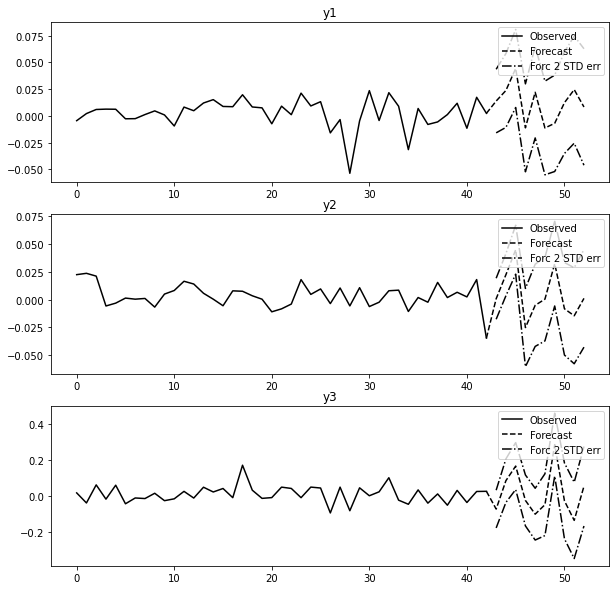

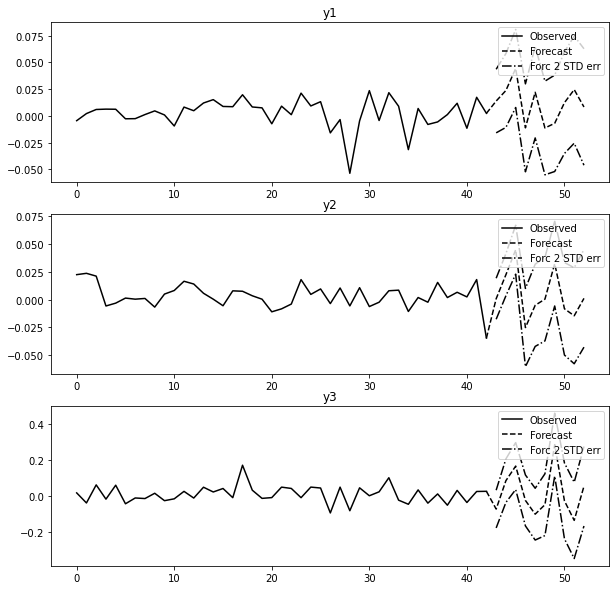

In [389]:
results.plot_forecast(10)

# VAR model and forecasts Q4

VAR model describe the dynamic interrelationship among stationary variables

In [390]:
data_use = np.array([SPDR, iShares, BTC]).T ## y1, y2 and y3 corresponds to SPDR, iShares, BTC

#Fitting VAR model
results = model.fit(index)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Jul, 2021
Time:                     03:18:25
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -24.0154
Nobs:                     43.0000    HQIC:                  -24.0930
Log likelihood:           338.930    FPE:                3.28770e-11
AIC:                     -24.1383    Det(Omega_mle):     3.06860e-11
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.002405         0.002108            1.141           0.254

Results for equation y2
           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------

Fitting the results of Autocorrelation of VAR

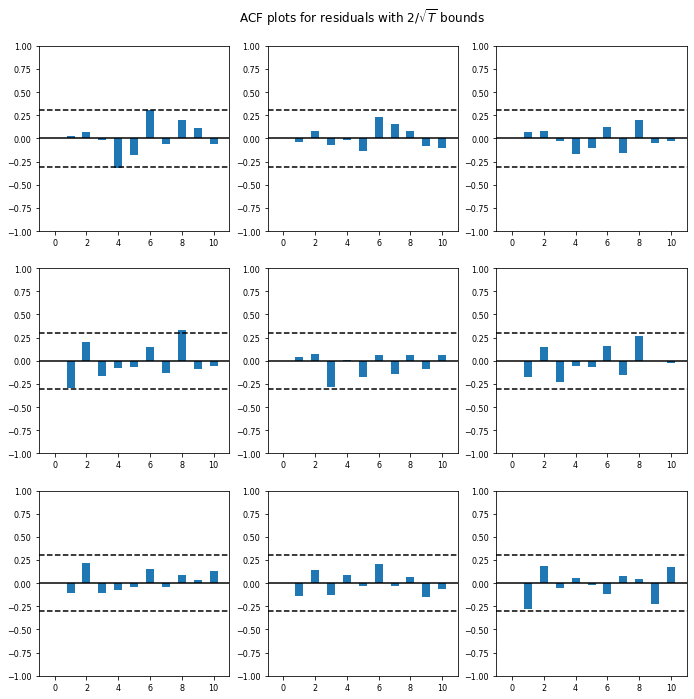

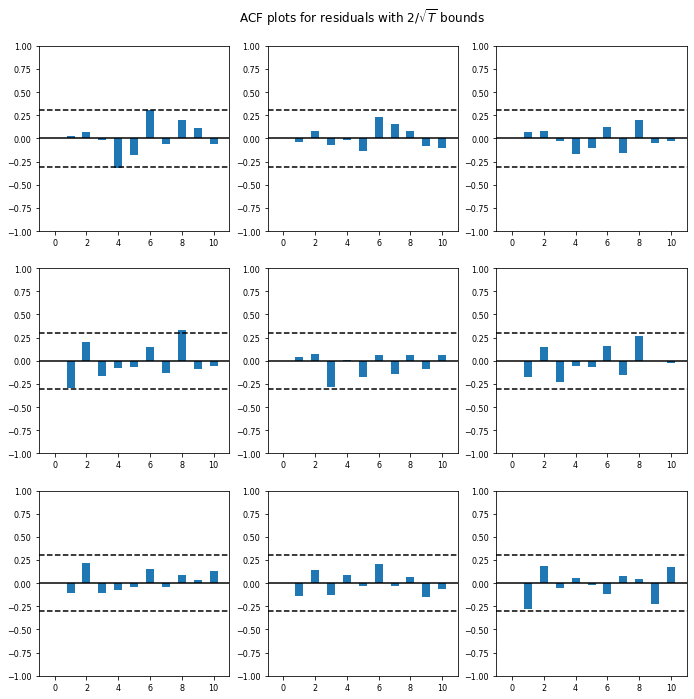

In [391]:
results.plot_acorr()

In [395]:
data_use = np.array([SPDR, iShares, BTC]).T
model = VAR(data)
results = model.fit(8)
print("\033[1m""LOWER BOUNDS OF CONFIDENCE INTERVALs:")
print("-"*40)
print(lower.round(3))
print("\n POINT FORECASTS")
print("-"*40)
print(forecast.round(3))
print("\n UPPER BOUNDS OF CONFIDENCE INTERVALS:")
print("-"*40)
print(upper.round(3))

LOWER BOUNDS OF CONFIDENCE INTERVALs:
----------------------------------------
[[-0.014 -0.033 -0.054]
 [-0.025 -0.048 -0.099]
 [-0.028 -0.048 -0.088]
 [-0.034 -0.054 -0.115]
 [-0.037 -0.056 -0.116]]

 POINT FORECASTS
----------------------------------------
[[ 0.017 -0.012  0.047]
 [ 0.01  -0.022  0.004]
 [ 0.014 -0.017  0.04 ]
 [ 0.011 -0.02   0.018]
 [ 0.013 -0.018  0.03 ]]

 UPPER BOUNDS OF CONFIDENCE INTERVALS:
----------------------------------------
[[0.049 0.009 0.147]
 [0.045 0.003 0.107]
 [0.055 0.013 0.167]
 [0.057 0.014 0.152]
 [0.063 0.019 0.177]]


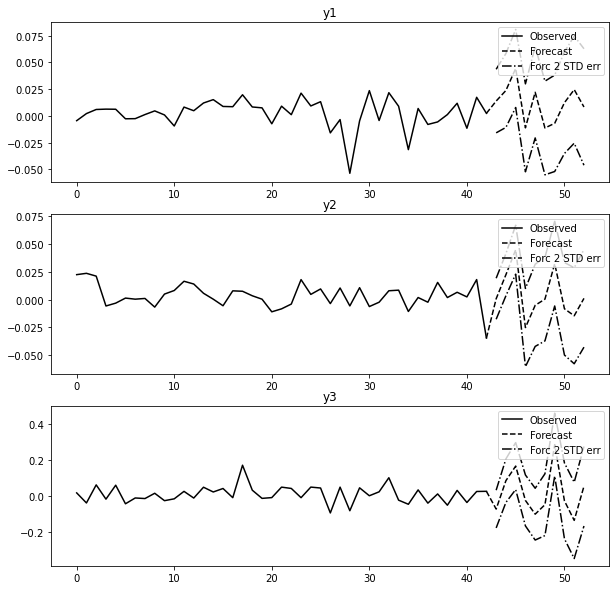

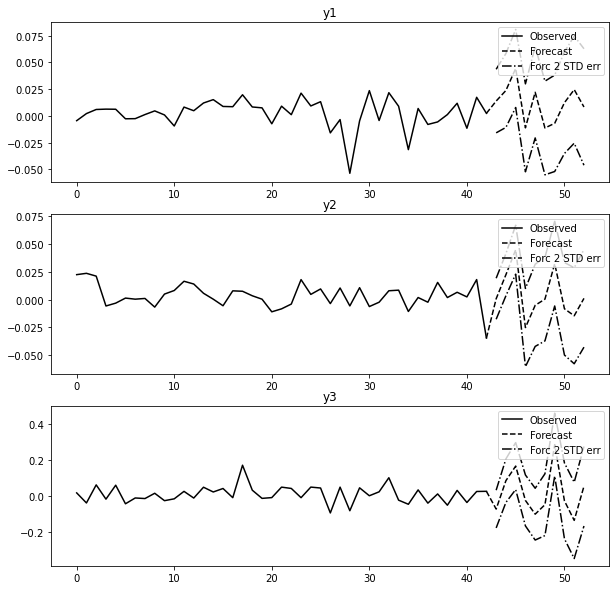

In [396]:
results.plot_forecast(10)

Impulse response of VAR

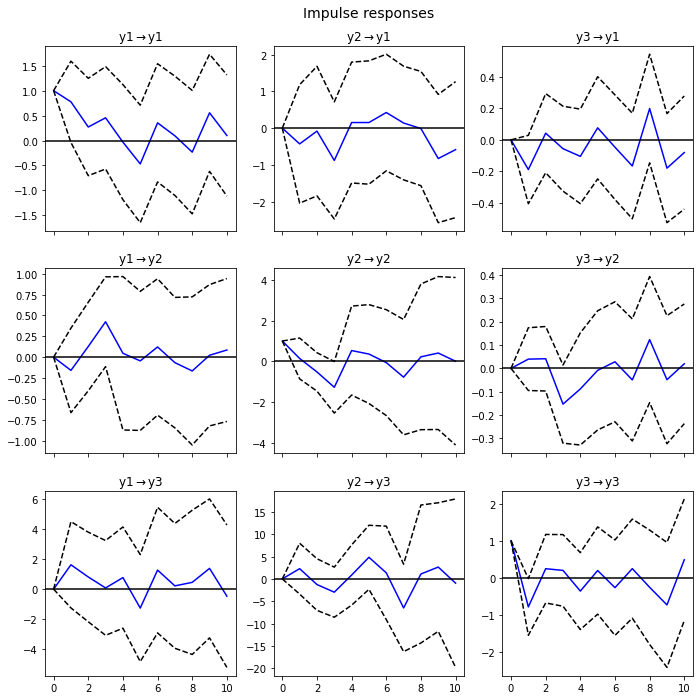

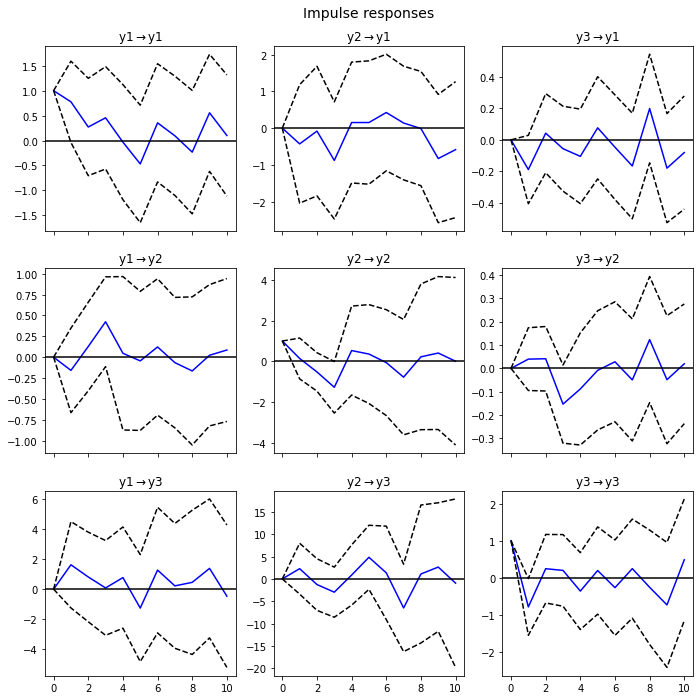

In [398]:
irf = results.irf(10)
irf.plot(orth=False)

# 8. Correlation vs Cointegration

# Does correlation have a direction?

# Does linear regression have a direction?

# Does cointegration have a direction?

# !!!!!!!!!!!!!This is the end of HTML !!!!!!!!!!!!